In [15]:
#The following function loads and pre-process the user-defined corpus from a specified path
#The function summarizes the steps discussed in notebook named 'Pre-processing Textual Data'
import os
import nltk
from nltk.corpus import *
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def load_preprocess_corpus(path):
    #loads corpus as lsit of strings in content list
    filenames=os.listdir(path)
    content=[]
    for i in range(len(filenames)):
        f=open(path+filenames[i])
        content.append(f.read())
        f.close()
    #Normalize, Tokenize, and Stop-word removal    
    stopword=nltk.corpus.stopwords.words('english')
    normalize_tokenize_nostop=[]
    for i in content:
        normalize_tokenize_nostop.append([word.lower() for word in i.split() if word.isalpha() and word not in stopword])
    #Stemming of words
    final=[]
    ps=PorterStemmer()
    for i in normalize_tokenize_nostop:    
        final.append(' '.join([ps.stem(word) for word in i]))
    return final

In [16]:
path='C:/Users/jasme/Desktop/dataset/'
content=load_preprocess_corpus(path)
content

['data scienc import field scienc',
 'thi import data scienc cours',
 'the car driven road',
 'the truck driven highway']

# Pre-processed Corpus to Feature Matrix
After pre-processing the text (documents) of the corpus, we can construct feature matrix from the pre-processed corpus and hence convert the unstructured data to structured form.

Following two types of feature matrix are broadly used for textual data:
1. Term-Document Matrix (TDM)/ Document-Term Matrix (DTM)/Bag-of-Words (BoW)
2. Term-Term Matrix (TTM)/Co-occurrence matrix 


# Variants of TDM
Depending upon how the ijth entry of the TDM matrix is filled, there are different variants of TDM matrix:
1. Binary
2. Term Frequency
3. Term Frequency with length normalization
4. Term Frequency wit maximum normalization
5. Term Frequency with log normalization
6. Term Frequency-Inverse Document Frequency

# Variant 1: Binary TDM

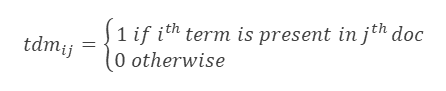

In [17]:
#Binary TDM from Scratch
path='C:/Users/jasme/Desktop/dataset/'
filenames=os.listdir(path)
doc_count={} #dictionary for each document
for i in range(len(content)):
    word_count={} #dictionary for words for each document
    for word in content[i].split():
        if word not in word_count.keys():
            word_count[word]=1
    doc_count[filenames[i]]=word_count
doc_count


{'1.txt': {'data': 1, 'scienc': 1, 'import': 1, 'field': 1},
 '2.txt': {'thi': 1, 'import': 1, 'data': 1, 'scienc': 1, 'cours': 1},
 '3.txt': {'the': 1, 'car': 1, 'driven': 1, 'road': 1},
 '4.txt': {'the': 1, 'truck': 1, 'driven': 1, 'highway': 1}}

In [19]:
#Converting dictionary to a TDM dataframe
import pandas as pd
binary_tdm_scratch=pd.DataFrame(doc_count)
binary_tdm_scratch.fillna(0,inplace=True)
binary_tdm_scratch

,1.txt,2.txt,3.txt,4.txt
data,1.0,1.0,0.0,0.0
scienc,1.0,1.0,0.0,0.0
import,1.0,1.0,0.0,0.0
field,1.0,0.0,0.0,0.0
thi,0.0,1.0,0.0,0.0
cours,0.0,1.0,0.0,0.0
the,0.0,0.0,1.0,1.0
car,0.0,0.0,1.0,0.0
driven,0.0,0.0,1.0,1.0
road,0.0,0.0,1.0,0.0


In [23]:
#Binary TDM using In-built function called CountVectorizer() class of sklearn.feature_extraction.text class

#Syntax: sklearn.feature_extraction.text.CountVectorizer
#(*, input='content', encoding='utf-8', decode_error='strict', 
#strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None,
#stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), 
#analyzer='word', max_df=1.0, min_df=1, max_features=None,
#vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)

#For binary TDM set binary=True
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(binary=True)
X=cv.fit_transform(content) # returns a binary tdm in compressed sparse row format
print(X)

  (0, 2)	1
  (0, 8)	1
  (0, 6)	1
  (0, 4)	1
  (1, 2)	1
  (1, 8)	1
  (1, 6)	1
  (1, 10)	1
  (1, 1)	1
  (2, 9)	1
  (2, 0)	1
  (2, 3)	1
  (2, 7)	1
  (3, 9)	1
  (3, 3)	1
  (3, 11)	1
  (3, 5)	1


In [25]:
#Converting X to TDM DataFrame
binary_tdm_inbuilt=pd.DataFrame(X.toarray().T,index=cv.get_feature_names(),columns=filenames)
binary_tdm_inbuilt

,1.txt,2.txt,3.txt,4.txt
car,0,0,1,0
cours,0,1,0,0
data,1,1,0,0
driven,0,0,1,1
field,1,0,0,0
highway,0,0,0,1
import,1,1,0,0
road,0,0,1,0
scienc,1,1,0,0
the,0,0,1,1


# Variant 2: Term Frequency TDM

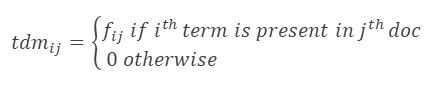

In [27]:
# Term frequency TDM from scratch
path='C:/Users/jasme/Desktop/dataset/'
filenames=os.listdir(path)
doc_count1={} #dictionary for each document
for i in range(len(content)):
    word_count1={} #dictionary for words for each document
    for word in content[i].split():
        if word not in word_count1.keys():
            word_count1[word]=0
        word_count1[word]+=1
    doc_count1[filenames[i]]=word_count1
doc_count1


{'1.txt': {'data': 1, 'scienc': 2, 'import': 1, 'field': 1},
 '2.txt': {'thi': 1, 'import': 1, 'data': 1, 'scienc': 1, 'cours': 1},
 '3.txt': {'the': 1, 'car': 1, 'driven': 1, 'road': 1},
 '4.txt': {'the': 1, 'truck': 1, 'driven': 1, 'highway': 1}}

In [28]:
#Converting dictionary to term frequency TDM dataframe
tdm_tf_scratch=pd.DataFrame(doc_count1)
tdm_tf_scratch.fillna(0,inplace=True)
tdm_tf_scratch

,1.txt,2.txt,3.txt,4.txt
data,1.0,1.0,0.0,0.0
scienc,2.0,1.0,0.0,0.0
import,1.0,1.0,0.0,0.0
field,1.0,0.0,0.0,0.0
thi,0.0,1.0,0.0,0.0
cours,0.0,1.0,0.0,0.0
the,0.0,0.0,1.0,1.0
car,0.0,0.0,1.0,0.0
driven,0.0,0.0,1.0,1.0
road,0.0,0.0,1.0,0.0


In [29]:
# Term frequency TDM using CountVectorizer of Sklearn library
from sklearn.feature_extraction.text import CountVectorizer
cv1=CountVectorizer()
Y=cv1.fit_transform(content) # returns a term frequency tdm in compressed sparse row (csr) format 
print(Y)

  (0, 2)	1
  (0, 8)	2
  (0, 6)	1
  (0, 4)	1
  (1, 2)	1
  (1, 8)	1
  (1, 6)	1
  (1, 10)	1
  (1, 1)	1
  (2, 9)	1
  (2, 0)	1
  (2, 3)	1
  (2, 7)	1
  (3, 9)	1
  (3, 3)	1
  (3, 11)	1
  (3, 5)	1


In [30]:
# Converting csr format to dataframe
tdm_tf_inbuilt=pd.DataFrame(Y.toarray().T,index=cv1.get_feature_names(),columns=filenames)
tdm_tf_inbuilt

,1.txt,2.txt,3.txt,4.txt
car,0,0,1,0
cours,0,1,0,0
data,1,1,0,0
driven,0,0,1,1
field,1,0,0,0
highway,0,0,0,1
import,1,1,0,0
road,0,0,1,0
scienc,2,1,0,0
the,0,0,1,1


# Variant 3: Term Frequency with length Normalization TDM

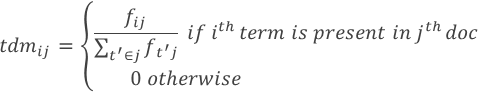

In [32]:
#Term Frequency with length Normalization TDM from scratch

#First we need to create term frequency TDM (i.e. tdm_tf_scratch) and then 
#divide each column (each document) with the sum total of frequencies of all 
#the terms in the document (column totals)

tdm_length_norm_scratch=tdm_tf_scratch.iloc[:,:].div(tdm_tf_scratch.sum(axis=0),axis=1)
tdm_length_norm_scratch

,1.txt,2.txt,3.txt,4.txt
data,0.2,0.2,0.00,0.00
scienc,0.4,0.2,0.00,0.00
import,0.2,0.2,0.00,0.00
field,0.2,0.0,0.00,0.00
thi,0.0,0.2,0.00,0.00
cours,0.0,0.2,0.00,0.00
the,0.0,0.0,0.25,0.25
car,0.0,0.0,0.25,0.00
driven,0.0,0.0,0.25,0.25
road,0.0,0.0,0.25,0.00


In [33]:
#Term Frequency with length Normalization TDM using TfIdfVectorizer class of sklearn
#Syntax:
#sklearn.feature_extraction.text.TfidfVectorizer(*, input='content',
#encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True,
#preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, 
#token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), max_df=1.0, min_df=1, 
#max_features=None, vocabulary=None, binary=False, 
#dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, 
#sublinear_tf=False)

# for only tf set use_idf=False and length normalization set norm='l1'

from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(use_idf=False,norm='l1')
Z=tf.fit_transform(content) # returns length normalized csr


In [35]:
#Converting CSR format to dataframe
tdm_len_norm_inbuilt=pd.DataFrame(Z.toarray().T,index=tf.get_feature_names(),columns=filenames)
tdm_len_norm_inbuilt

,1.txt,2.txt,3.txt,4.txt
car,0.0,0.0,0.25,0.00
cours,0.0,0.2,0.00,0.00
data,0.2,0.2,0.00,0.00
driven,0.0,0.0,0.25,0.25
field,0.2,0.0,0.00,0.00
highway,0.0,0.0,0.00,0.25
import,0.2,0.2,0.00,0.00
road,0.0,0.0,0.25,0.00
scienc,0.4,0.2,0.00,0.00
the,0.0,0.0,0.25,0.25


# Variant 4: Term Frequency with Max Normalization TDM

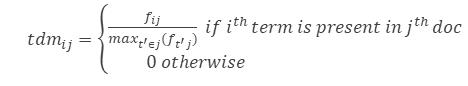

In [38]:
#Term Frequency with Max Normalization TDM from scratch
#First we need to create term frequency TDM (i.e. tdm_tf_scratch) and then 
#divide each column (each document) with the maximum of frequencies of all 
#the terms in the document (column maximum)

tdm_max_norm_scratch=tdm_tf_scratch.iloc[:,:].div(tdm_tf_scratch.max(axis=0),axis=1)
tdm_max_norm_scratch

# There is no in-built method for max normalization TDM

,1.txt,2.txt,3.txt,4.txt
data,0.5,1.0,0.0,0.0
scienc,1.0,1.0,0.0,0.0
import,0.5,1.0,0.0,0.0
field,0.5,0.0,0.0,0.0
thi,0.0,1.0,0.0,0.0
cours,0.0,1.0,0.0,0.0
the,0.0,0.0,1.0,1.0
car,0.0,0.0,1.0,0.0
driven,0.0,0.0,1.0,1.0
road,0.0,0.0,1.0,0.0


# Variant 5: Term Frequency with Log Normalization TDM

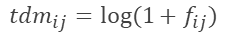

In [40]:
#Term Frequency with Log Normalization TDM from scratch
import numpy as np
tdm_log_norm_scratch=np.log10(1+tdm_tf_scratch)
tdm_log_norm_scratch

#There is no in built method for log normalization

,1.txt,2.txt,3.txt,4.txt
data,0.301030,0.30103,0.00000,0.00000
scienc,0.477121,0.30103,0.00000,0.00000
import,0.301030,0.30103,0.00000,0.00000
field,0.301030,0.00000,0.00000,0.00000
thi,0.000000,0.30103,0.00000,0.00000
cours,0.000000,0.30103,0.00000,0.00000
the,0.000000,0.00000,0.30103,0.30103
car,0.000000,0.00000,0.30103,0.00000
driven,0.000000,0.00000,0.30103,0.30103
road,0.000000,0.00000,0.30103,0.00000


# Variant 6: Term Frequency- Inverse Document Frequency TDM

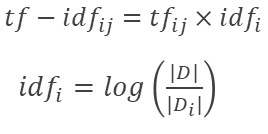

Where |D| represents total number of documents in the corpus and |Di| represents number of documents in which ith term is present.

In [45]:
#Computing idf from scratch
no_of_docs=len(filenames)
unique_terms=tdm_length_norm_scratch.index #as idf is computed for each unique term of corpus
idf_count={} #to store idf score of each term of corpus
for term in unique_terms:
    idf_count[term]=0 #initializing entry in idf dictionary
    for doc in content:
        if term in doc.split():
            idf_count[term]+=1
    idf_count[term]=np.log10(no_of_docs/idf_count[term])
idf_count

{'data': 0.3010299956639812,
 'scienc': 0.3010299956639812,
 'import': 0.3010299956639812,
 'field': 0.6020599913279624,
 'thi': 0.6020599913279624,
 'cours': 0.6020599913279624,
 'the': 0.3010299956639812,
 'car': 0.6020599913279624,
 'driven': 0.3010299956639812,
 'road': 0.6020599913279624,
 'truck': 0.6020599913279624,
 'highway': 0.6020599913279624}

In [46]:
#Converting idf_count dictionary to DataFrame
idf_series=pd.Series(idf_count)
idf=pd.DataFrame(idf_series)
idf

,0
data,0.30103
scienc,0.30103
import,0.30103
field,0.60206
thi,0.60206
cours,0.60206
the,0.30103
car,0.60206
driven,0.30103
road,0.60206


In [47]:
#Computing tf-idf by multiplying tf and idf
tf_idf_scratch=tdm_length_norm_scratch*idf.values
tf_idf_scratch

,1.txt,2.txt,3.txt,4.txt
data,0.060206,0.060206,0.000000,0.000000
scienc,0.120412,0.060206,0.000000,0.000000
import,0.060206,0.060206,0.000000,0.000000
field,0.120412,0.000000,0.000000,0.000000
thi,0.000000,0.120412,0.000000,0.000000
cours,0.000000,0.120412,0.000000,0.000000
the,0.000000,0.000000,0.075257,0.075257
car,0.000000,0.000000,0.150515,0.000000
driven,0.000000,0.000000,0.075257,0.075257
road,0.000000,0.000000,0.150515,0.000000


In [48]:
#Term Frequency-Inverse Document Frequency TDM using TfIdfVectorizer class of sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tf1=TfidfVectorizer()
U=tf1.fit_transform(content)
tf_idf_inbuilt=pd.DataFrame(U.toarray().T,index=tf1.get_feature_names(),columns=filenames)
tf_idf_inbuilt

,1.txt,2.txt,3.txt,4.txt
car,0.000000,0.000000,0.555283,0.000000
cours,0.000000,0.508672,0.000000,0.000000
data,0.362529,0.401043,0.000000,0.000000
driven,0.000000,0.000000,0.437791,0.437791
field,0.459822,0.000000,0.000000,0.000000
highway,0.000000,0.000000,0.000000,0.555283
import,0.362529,0.401043,0.000000,0.000000
road,0.000000,0.000000,0.555283,0.000000
scienc,0.725058,0.401043,0.000000,0.000000
the,0.000000,0.000000,0.437791,0.437791


# The output of TF-IDF inbuilt and from scratch is different
 
 This is due to reason because it uses:
 1. l2 normalization for term frequency
 2. It uses different formula for idf
 
 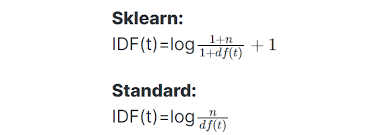

# Term-Term Matrix/ Co-occurrence Matrix

The rows and columns of the TTM represents the vocabulary (unique terms) of the matrix. Each ijth entry of the TTM matrix represents co-occurrence frequency i.e. number of documents in which ith and jth terms occurs

Co-occurrence matrix can be computed from binary TDM as follows:
1. Construct a binary-term document matrix (TDM) from a given corpus.
2. Multiply TDM with its transpose.
3. Set the diagonal elements to 0.


In [64]:
# Co-occurrence matrix from binary TDM
co_occur_matrix=np.dot(binary_tdm_scratch.values,binary_tdm_scratch.values.T)
np.fill_diagonal(co_occur_matrix,0)
co_occur_matrix=pd.DataFrame(co_occur_matrix, index=binary_tdm_scratch.index,
                            columns=binary_tdm_scratch.index)
co_occur_matrix

,data,scienc,import,field,thi,cours,the,car,driven,road,truck,highway
data,0.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
scienc,2.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
import,2.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
field,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thi,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
cours,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0
car,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
driven,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0
road,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [57]:
np.dot(binary_tdm_scratch.values,binary_tdm_scratch.values.T)

array([[2., 2., 2., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [2., 2., 2., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [2., 2., 2., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 1., 2., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 1., 2., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.]])